In [74]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import rasterio
from rasterio.features import shapes
from shapely.geometry import shape

# Data

In [2]:
metro_df = pd.read_csv('medellin_metro.csv',encoding='cp1252')
metro_df

,stop,line,comuna_name,comuna_index,macrozona,municipality,muni_index,Lattitude,Longitude,type,transfer,transfer2
0,Bello,A,Bello-Comuna 03 ',8,8,bello,3,6.337778,-75.544444,Metro,NaN,NaN
1,Palos verdes,L1,Manrique ',9,13,medellin,1,6.330278,-75.553611,Bus rapid transit,L1,NaN
2,Gardel,L1,Manrique ',9,13,medellin,1,6.315833,-75.555417,Bus rapid transit,L1,NaN
3,Manrique,L1,Manrique ',9,13,medellin,1,6.300278,-75.558472,Bus rapid transit,L1,NaN
4,Las Esmeraldas,L1,Manrique ',9,13,medellin,1,6.290597,-75.564258,Bus rapid transit,L1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
89,Oriente,T-A,Villa Hermosa ',61,20,medellin,1,6.268324,-75.554901,Tramway,H,NaN
90,Arv’,L,Corregimiento Santa Elena ',64,47,medellin,1,6.273219,-75.554192,Cable,NaN,NaN
91,Popular,K,Popular ',65,31,medellin,1,6.278936,-75.552797,Cable,NaN,NaN
92,Santo Domingo Savio,K,Popular ',65,31,medellin,1,6.283007,-75.552707,Cable,L,NaN


In [3]:
metro_df['line'].unique()

array(['A', 'L1', 'L2', 'K', 'J', 'B', 'T-A', 'H', 'L'], dtype=object)

In [4]:
metro_df['transfer'].unique()

array([nan, 'L1', 'L2', '2', 'J', 'B', 'K', 'A', 'T-A', 'H', 'L'],
      dtype=object)

In [36]:
metro_df['type'].unique()

array(['Metro', 'Bus rapid transit', 'Cable', 'Tramway'], dtype=object)

In [6]:
comuna_df = pd.read_csv('comunas.csv')
comuna_df = comuna_df.rename(columns={'Macrozona _shapefile':'macrozona'})
comuna_df 

,comuna name,comuna_index,municipality,muni_index,comuna longitude,comuna latitude,macrozona
0,Itagui-Comuna 06 ',1,'Itagui',8,-75.61493,6.176629,1
1,Itagui-Comuna 05 ',2,'Itagui',8,-75.60698,6.180733,2
2,Urbana La Estrella ',3,'La Estrella',9,-75.63781,6.142994,25
3,Bello-Comuna 06 ',4,'Bello',3,-75.56693,6.352998,6
4,Bello-Comuna 05 ',5,'Bello',3,-75.56992,6.341258,5
...,...,...,...,...,...,...,...
61,Rural Girardota ',62,'Girardota',7,-75.44836,6.380775,41
62,Urbana Girardota ',63,'Girardota',7,-75.44330,6.380888,27
63,Corregimiento Santa Elena ',64,'Medellin',1,-75.51665,6.234823,47
64,Popular ',65,'Medellin',1,-75.54420,6.293636,31


In [7]:
commutes_df = pd.read_csv('comunas_commutes.csv')
commutes_df

,origin,dest,no of trips
0,1,1,271
1,2,1,40
2,3,1,56
3,4,1,42
4,7,1,45
...,...,...,...
3342,55,66,2
3343,56,66,1
3344,59,66,2
3345,64,66,10


<Axes: >

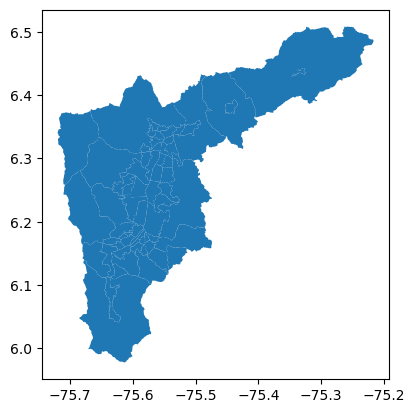

In [8]:
comuna_gdf = gpd.read_file('comunas_boundaries/MACROZONAS.shp')
comuna_gdf.columns=['municipality','macrozona','geometry']
comuna_gdf.plot()

In [31]:
comuna_gdf.head()

,municipality,macrozona,geometry
0,ITAGUI,1.0,"POLYGON ((-75.61279 6.18084, -75.61243 6.18052..."
1,ITAGUI,2.0,"POLYGON ((-75.61284 6.18427, -75.61274 6.18419..."
2,La Estrella,25.0,"POLYGON ((-75.64759 6.16577, -75.64759 6.16572..."
3,Bello,6.0,"POLYGON ((-75.57469 6.36276, -75.57469 6.36271..."
4,Bello,5.0,"POLYGON ((-75.56883 6.35035, -75.56894 6.35034..."


In [9]:
gmaps_df = pd.read_csv('comunas_gmaps.csv')
gmaps_df

,travel_time_m,mode,origin,destination
0,0.000000,driving,1,1
1,7.150000,driving,1,2
2,17.933333,driving,1,3
3,46.266667,driving,1,4
4,43.550000,driving,1,5
...,...,...,...,...
13063,453.366667,walking,66,62
13064,459.766667,walking,66,63
13065,283.316667,walking,66,64
13066,261.116667,walking,66,65


In [10]:
gmaps_df['mode'].unique()

array(['driving', 'transit', 'walking'], dtype=object)

In [11]:
pop_df = pd.read_csv('comunas_pop.csv')
pop_df

,comuna_index,muni_index,population
0,1,8,13458
1,2,8,12853
2,3,9,23758
3,4,3,19296
4,5,3,22363
...,...,...,...
61,62,7,10310
62,63,7,5052
63,64,1,218422
64,65,1,47820


In [12]:
firms_df = pd.read_csv('comunas_firms.csv')
firms_df

,comuna_index,muni_index,num_firms
0,1,8,494
1,2,8,949
2,3,9,1946
3,4,3,733
4,5,3,1459
...,...,...,...
61,62,7,151
62,63,7,992
63,64,1,37
64,65,1,685


In [13]:
stratum_df = pd.read_csv('comunas_stratum.csv')
stratum_df

,comuna_index,muni_index,stratum
0,1,8,1.901746
1,2,8,2.040128
2,3,9,2.467947
3,4,3,1.955026
4,5,3,2.206717
...,...,...,...
61,62,7,2.183294
62,63,7,2.146245
63,64,1,1.986825
64,65,1,1.510299


# Analysis

In [33]:
merged_df = pd.merge(comuna_gdf[['macrozona','geometry']],comuna_df, on = 'macrozona')
merged_df = pd.merge(merged_df,pop_df[['comuna_index','population']], on = 'comuna_index')
merged_df = pd.merge(merged_df,firms_df[['comuna_index','num_firms']], on = 'comuna_index')
final_df = pd.merge(merged_df,stratum_df[['comuna_index','stratum']], on = 'comuna_index')
final_df

,macrozona,geometry,comuna name,comuna_index,municipality,muni_index,comuna longitude,comuna latitude,population,num_firms,stratum
0,1.0,"POLYGON ((-75.61279 6.18084, -75.61243 6.18052...",Itagui-Comuna 06 ',1,'Itagui',8,-75.61493,6.176629,13458,494,1.901746
1,2.0,"POLYGON ((-75.61284 6.18427, -75.61274 6.18419...",Itagui-Comuna 05 ',2,'Itagui',8,-75.60698,6.180733,12853,949,2.040128
2,25.0,"POLYGON ((-75.64759 6.16577, -75.64759 6.16572...",Urbana La Estrella ',3,'La Estrella',9,-75.63781,6.142994,23758,1946,2.467947
3,6.0,"POLYGON ((-75.57469 6.36276, -75.57469 6.36271...",Bello-Comuna 06 ',4,'Bello',3,-75.56693,6.352998,19296,733,1.955026
4,5.0,"POLYGON ((-75.56883 6.35035, -75.56894 6.35034...",Bello-Comuna 05 ',5,'Bello',3,-75.56992,6.341258,22363,1459,2.206717
...,...,...,...,...,...,...,...,...,...,...,...
63,20.0,"POLYGON ((-75.54281 6.26130, -75.54281 6.26130...",Villa Hermosa ',61,'Medellin',1,-75.54412,6.247540,75905,3284,1.754728
64,27.0,"POLYGON ((-75.43592 6.39105, -75.43571 6.39031...",Urbana Girardota ',63,'Girardota',7,-75.44330,6.380888,5052,992,2.146245
65,47.0,"POLYGON ((-75.52505 6.28801, -75.52498 6.28802...",Corregimiento Santa Elena ',64,'Medellin',1,-75.51665,6.234823,218422,37,1.986825
66,31.0,"POLYGON ((-75.54807 6.30441, -75.54803 6.30440...",Popular ',65,'Medellin',1,-75.54420,6.293636,47820,685,1.510299


<Axes: >

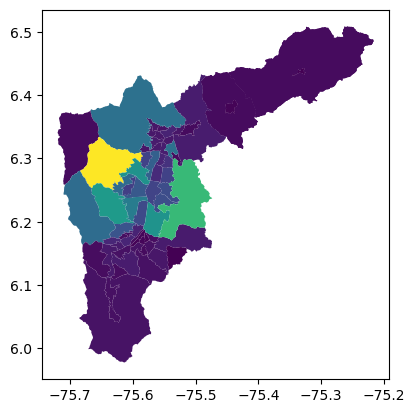

In [15]:
final_df.plot('population')

<Axes: >

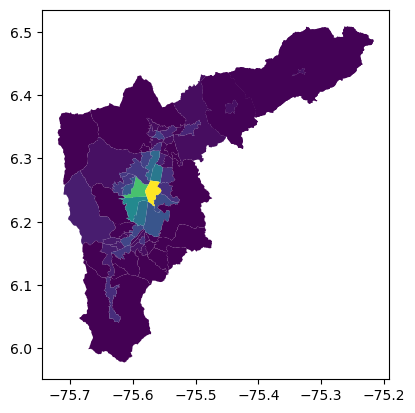

In [16]:
final_df.plot('num_firms')

<Axes: >

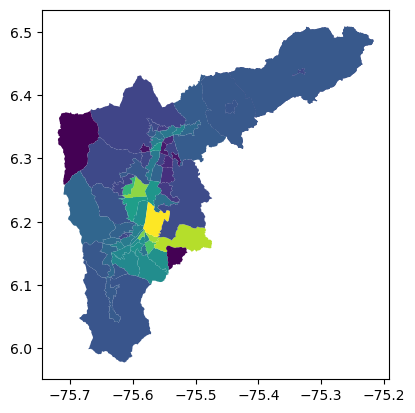

In [17]:
final_df.plot('stratum')

In [18]:
metro_gdf = gpd.GeoDataFrame(metro_df, geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Lattitude'])])
metro_gdf.set_crs(final_df.crs, inplace=True)
metro_gdf

,stop,line,comuna_name,comuna_index,macrozona,municipality,muni_index,Lattitude,Longitude,type,transfer,transfer2,geometry
0,Bello,A,Bello-Comuna 03 ',8,8,bello,3,6.337778,-75.544444,Metro,NaN,NaN,POINT (-75.54444 6.33778)
1,Palos verdes,L1,Manrique ',9,13,medellin,1,6.330278,-75.553611,Bus rapid transit,L1,NaN,POINT (-75.55361 6.33028)
2,Gardel,L1,Manrique ',9,13,medellin,1,6.315833,-75.555417,Bus rapid transit,L1,NaN,POINT (-75.55542 6.31583)
3,Manrique,L1,Manrique ',9,13,medellin,1,6.300278,-75.558472,Bus rapid transit,L1,NaN,POINT (-75.55847 6.30028)
4,Las Esmeraldas,L1,Manrique ',9,13,medellin,1,6.290597,-75.564258,Bus rapid transit,L1,NaN,POINT (-75.56426 6.29060)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Oriente,T-A,Villa Hermosa ',61,20,medellin,1,6.268324,-75.554901,Tramway,H,NaN,POINT (-75.55490 6.26832)
90,Arv’,L,Corregimiento Santa Elena ',64,47,medellin,1,6.273219,-75.554192,Cable,NaN,NaN,POINT (-75.55419 6.27322)
91,Popular,K,Popular ',65,31,medellin,1,6.278936,-75.552797,Cable,NaN,NaN,POINT (-75.55280 6.27894)
92,Santo Domingo Savio,K,Popular ',65,31,medellin,1,6.283007,-75.552707,Cable,L,NaN,POINT (-75.55271 6.28301)


In [51]:
single_stations = metro_gdf.loc[~metro_gdf['transfer'].isna()]
single_stations.head()

,stop,line,comuna_name,comuna_index,macrozona,municipality,muni_index,Lattitude,Longitude,type,transfer,transfer2,geometry
1,Palos verdes,L1,Manrique ',9,13,medellin,1,6.330278,-75.553611,Bus rapid transit,L1,NaN,POINT (-75.55361 6.33028)
2,Gardel,L1,Manrique ',9,13,medellin,1,6.315833,-75.555417,Bus rapid transit,L1,NaN,POINT (-75.55542 6.31583)
3,Manrique,L1,Manrique ',9,13,medellin,1,6.300278,-75.558472,Bus rapid transit,L1,NaN,POINT (-75.55847 6.30028)
4,Las Esmeraldas,L1,Manrique ',9,13,medellin,1,6.290597,-75.564258,Bus rapid transit,L1,NaN,POINT (-75.56426 6.29060)
5,Berl’n,L1,Manrique ',9,13,medellin,1,6.278333,-75.569444,Bus rapid transit,L1,NaN,POINT (-75.56944 6.27833)


In [55]:
double_stations = metro_gdf.loc[~ metro_gdf['transfer'].isna() & ~metro_gdf['transfer2'].isna()]
double_stations

,stop,line,comuna_name,comuna_index,macrozona,municipality,muni_index,Lattitude,Longitude,type,transfer,transfer2,geometry
25,Industriales,L2,Guayabal ',46,14,medellin,1,6.258611,-75.597778,Bus rapid transit,L1,A,POINT (-75.59778 6.25861)
29,Industriales,L1,El Poblado ',47,12,medellin,1,6.265694,-75.613694,Bus rapid transit,L2,A,POINT (-75.61369 6.26569)
75,Hospital,L1,La Candelaria ',60,19,medellin,1,6.232324,-75.591256,Bus rapid transit,L2,A,POINT (-75.59126 6.23232)
83,Hospital,L2,La Candelaria ',60,19,medellin,1,6.249923,-75.563881,Bus rapid transit,L1,A,POINT (-75.56388 6.24992)


In [19]:
metro_stations = metro_gdf.loc[metro_gdf['type']=='Metro']
bus_stations = metro_gdf.loc[metro_gdf['type']=='Bus rapid transit']
cable_stations = metro_gdf.loc[metro_gdf['type']=='Tramway']
tram_stations = metro_gdf.loc[metro_gdf['type']=='Cable']

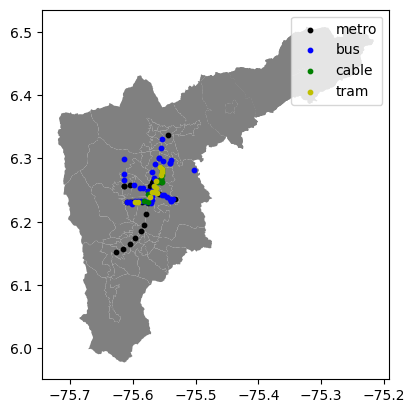

In [20]:
f, ax = plt.subplots()
final_df.plot(ax = ax, color = 'grey')
metro_stations.plot(ax = ax, color='k', markersize=10, label = 'metro')
bus_stations.plot(ax = ax, color='b', markersize=10, label = 'bus')
cable_stations.plot(ax = ax, color='g', markersize=10, label = 'cable')
tram_stations.plot(ax = ax, color='y', markersize=10, label = 'tram')
ax.legend()

In [21]:
def raster_to_geodataframe(tif_path):
    with rasterio.open(tif_path) as src:
        image = src.read(1)
        mask = image != src.nodata
        results = (
            {'properties': {'value': v}, 'geometry': s}
            for i, (s, v) in enumerate(shapes(image, mask=mask, transform=src.transform))
        )
        geoms = list(results)
        
        gdf = gpd.GeoDataFrame.from_features(geoms)
        gdf.crs = src.crs
        
        return gdf

In [22]:
worldpop_gdf = raster_to_geodataframe('COL_medellin_worldpop.tif')
elevation_gdf = raster_to_geodataframe('COL_medellin_elevation.tif')

In [23]:
worldpop_gdf

,geometry,value
0,"POLYGON ((-75.71989 6.50919, -75.71989 6.50829...",0.450788
1,"POLYGON ((-75.71900 6.50919, -75.71900 6.50829...",0.415169
2,"POLYGON ((-75.71810 6.50919, -75.71810 6.50829...",0.413502
3,"POLYGON ((-75.71720 6.50919, -75.71720 6.50829...",0.411388
4,"POLYGON ((-75.71630 6.50919, -75.71630 6.50829...",0.405934
...,...,...
331435,"POLYGON ((-75.22043 5.97829, -75.22043 5.97739...",0.139420
331436,"POLYGON ((-75.21953 5.97829, -75.21953 5.97739...",0.139457
331437,"POLYGON ((-75.21863 5.97829, -75.21863 5.97739...",0.146021
331438,"POLYGON ((-75.21774 5.97829, -75.21774 5.97739...",0.139054


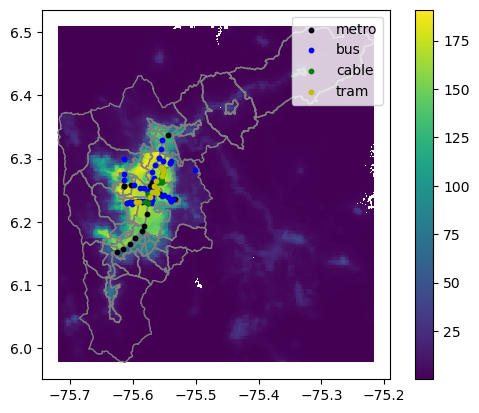

In [24]:
fig, ax = plt.subplots()
worldpop_gdf.plot(ax=ax, column='value', cmap='viridis', legend=True)
final_df.plot(ax = ax, facecolor="none", edgecolor="gray", linewidth=1)
metro_stations.plot(ax = ax, color='k', markersize=10, label = 'metro')
bus_stations.plot(ax = ax, color='b', markersize=10, label = 'bus')
cable_stations.plot(ax = ax, color='g', markersize=10, label = 'cable')
tram_stations.plot(ax = ax, color='y', markersize=10, label = 'tram')
ax.legend()
plt.show()

<Axes: >

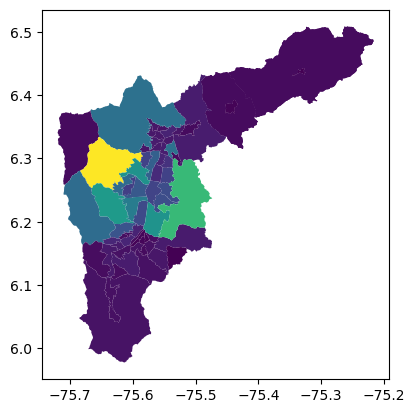

In [25]:
final_df.plot('population')

In [26]:
elevation_gdf

,geometry,value
0,"POLYGON ((-75.72015 6.50910, -75.72015 6.50829...",1251.0
1,"POLYGON ((-75.71934 6.50910, -75.71934 6.50829...",1276.0
2,"POLYGON ((-75.71853 6.50910, -75.71853 6.50829...",1318.0
3,"POLYGON ((-75.71772 6.50910, -75.71772 6.50829...",1359.0
4,"POLYGON ((-75.71691 6.50910, -75.71691 6.50829...",1399.0
...,...,...
365005,"POLYGON ((-75.22051 5.97873, -75.22051 5.97712...",1907.0
365006,"POLYGON ((-75.21970 5.97873, -75.21970 5.97712...",1877.0
365007,"POLYGON ((-75.21889 5.97873, -75.21889 5.97712...",1810.0
365008,"POLYGON ((-75.21808 5.97873, -75.21808 5.97712...",1770.0


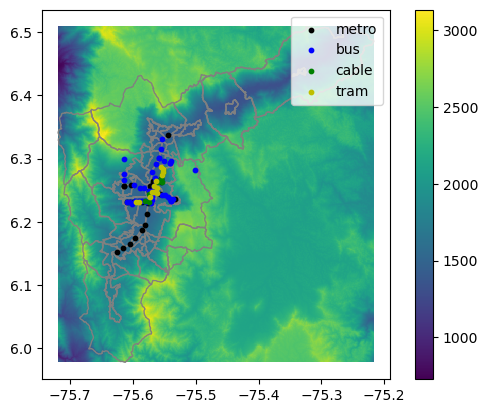

In [27]:
fig, ax = plt.subplots()
elevation_gdf.plot(ax=ax, column='value', cmap='viridis', legend=True)
final_df.plot(ax = ax, facecolor="none", edgecolor="gray", linewidth=1)
metro_stations.plot(ax = ax, color='k', markersize=10, label = 'metro')
bus_stations.plot(ax = ax, color='b', markersize=10, label = 'bus')
cable_stations.plot(ax = ax, color='g', markersize=10, label = 'cable')
tram_stations.plot(ax = ax, color='y', markersize=10, label = 'tram')
ax.legend()
plt.show()

<Axes: >

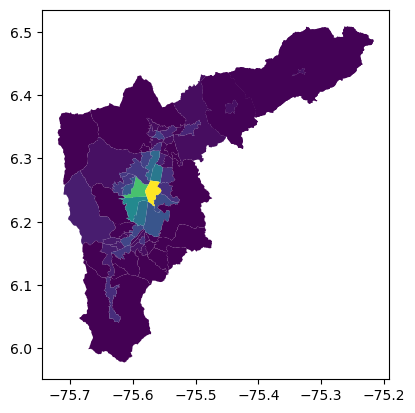

In [28]:
# economic center
final_df.plot('num_firms')

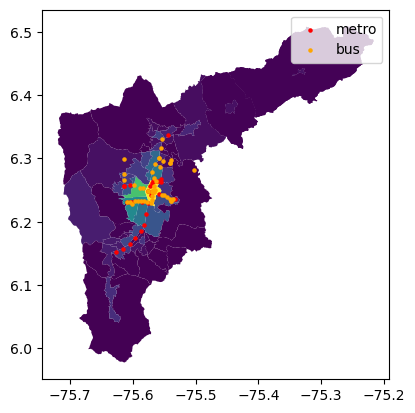

In [29]:
f, ax = plt.subplots()
final_df.plot(ax = ax, column='num_firms')
metro_stations.plot(ax = ax, color='red', markersize=5, label = 'metro')
bus_stations.plot(ax = ax, color='orange', markersize=5, label = 'bus')
ax.legend()

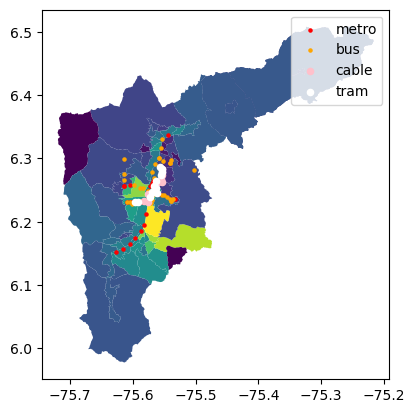

In [59]:
f, ax = plt.subplots()
final_df.plot(ax = ax, column='stratum')
metro_stations.plot(ax = ax, color='red', markersize=5, label = 'metro')
bus_stations.plot(ax = ax, color='orange', markersize=5, label = 'bus')
cable_stations.plot(ax = ax, color='pink', markersize=20, label = 'cable')
tram_stations.plot(ax = ax, color='white', markersize=20, label = 'tram')
ax.legend()

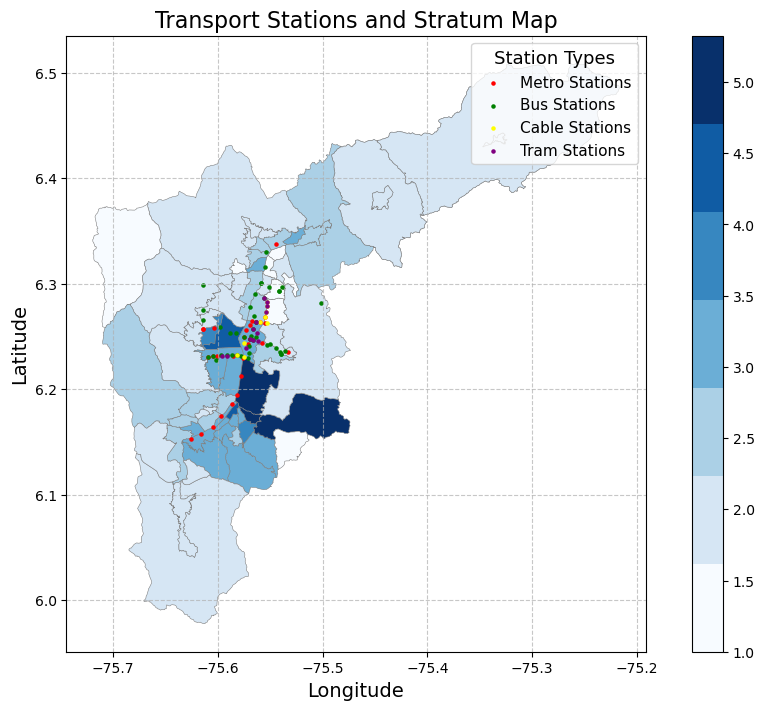

In [81]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the final dataframe with the 'stratum' column
final_df.plot(ax=ax, column='stratum', legend=True, cmap=plt.get_cmap('Blues', 7), edgecolor='grey',linewidth=0.4)

# Plot the metro, bus, cable, and tram stations with customized markers and labels
metro_stations.plot(ax=ax, color='red', markersize=5, label='Metro Stations', linestyle='None')
bus_stations.plot(ax=ax, color='green', markersize=5, label='Bus Stations', linestyle='None')
cable_stations.plot(ax=ax, color='yellow', markersize=5, label='Cable Stations', linestyle='None')
tram_stations.plot(ax=ax, color='purple', markersize=5, label='Tram Stations', linestyle='None')

# Add a title and labels
ax.set_title('Transport Stations and Stratum Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Customize the legend
legend = ax.legend(title='Station Types', title_fontsize='13', fontsize='11', loc='upper right')
#cbar = plt.colorbar(boundaries=np.arange(6))
# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

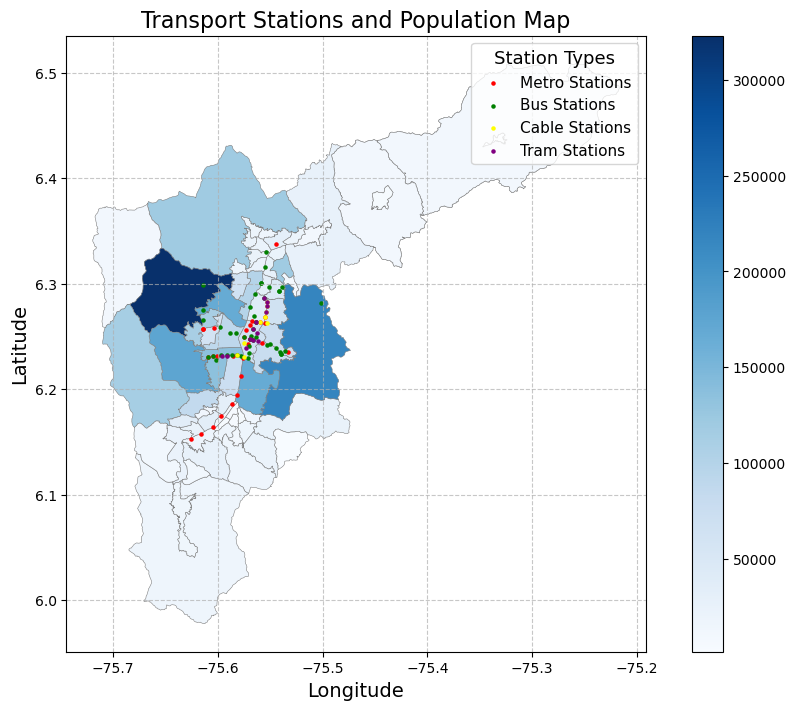

In [85]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the final dataframe with the 'stratum' column
final_df.plot(ax=ax, column='population', legend=True, cmap='Blues', edgecolor='grey',linewidth=0.4)

# Plot the metro, bus, cable, and tram stations with customized markers and labels
metro_stations.plot(ax=ax, color='red', markersize=5, label='Metro Stations', linestyle='None')
bus_stations.plot(ax=ax, color='green', markersize=5, label='Bus Stations', linestyle='None')
cable_stations.plot(ax=ax, color='yellow', markersize=5, label='Cable Stations', linestyle='None')
tram_stations.plot(ax=ax, color='purple', markersize=5, label='Tram Stations', linestyle='None')

# Add a title and labels
ax.set_title('Transport Stations and Population Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Customize the legend
legend = ax.legend(title='Station Types', title_fontsize='13', fontsize='11', loc='upper right')
#cbar = plt.colorbar(boundaries=np.arange(6))
# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

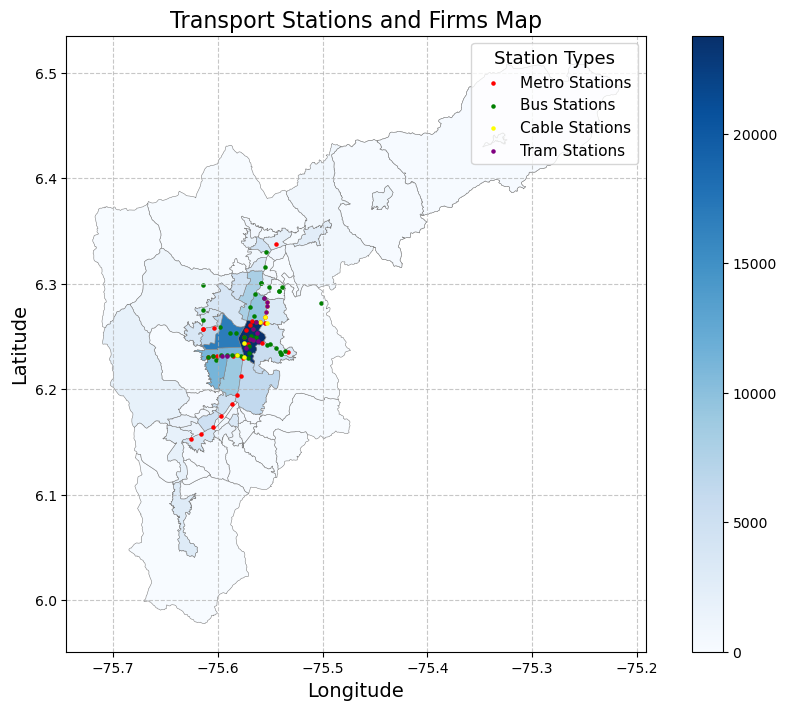

In [86]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the final dataframe with the 'stratum' column
final_df.plot(ax=ax, column='num_firms', legend=True, cmap='Blues', edgecolor='grey',linewidth=0.4)

# Plot the metro, bus, cable, and tram stations with customized markers and labels
metro_stations.plot(ax=ax, color='red', markersize=5, label='Metro Stations', linestyle='None')
bus_stations.plot(ax=ax, color='green', markersize=5, label='Bus Stations', linestyle='None')
cable_stations.plot(ax=ax, color='yellow', markersize=5, label='Cable Stations', linestyle='None')
tram_stations.plot(ax=ax, color='purple', markersize=5, label='Tram Stations', linestyle='None')

# Add a title and labels
ax.set_title('Transport Stations and Firms Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Customize the legend
legend = ax.legend(title='Station Types', title_fontsize='13', fontsize='11', loc='upper right')
#cbar = plt.colorbar(boundaries=np.arange(6))
# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

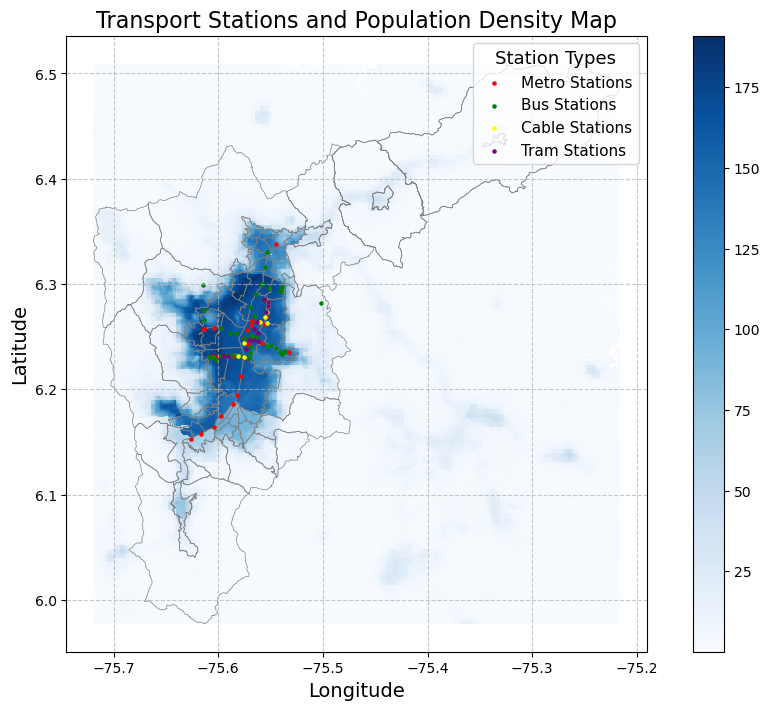

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the final dataframe with the 'stratum' column
worldpop_gdf.plot(ax=ax, column='value', cmap='Blues', legend=True)
final_df.plot(ax = ax, facecolor="none", edgecolor="gray", linewidth=0.5)

# Plot the metro, bus, cable, and tram stations with customized markers and labels
metro_stations.plot(ax=ax, color='red', markersize=5, label='Metro Stations', linestyle='None')
bus_stations.plot(ax=ax, color='green', markersize=5, label='Bus Stations', linestyle='None')
cable_stations.plot(ax=ax, color='yellow', markersize=5, label='Cable Stations', linestyle='None')
tram_stations.plot(ax=ax, color='purple', markersize=5, label='Tram Stations', linestyle='None')

# Add a title and labels
ax.set_title('Transport Stations and Population Density Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Customize the legend
legend = ax.legend(title='Station Types', title_fontsize='13', fontsize='11', loc='upper right')
#cbar = plt.colorbar(boundaries=np.arange(6))
# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

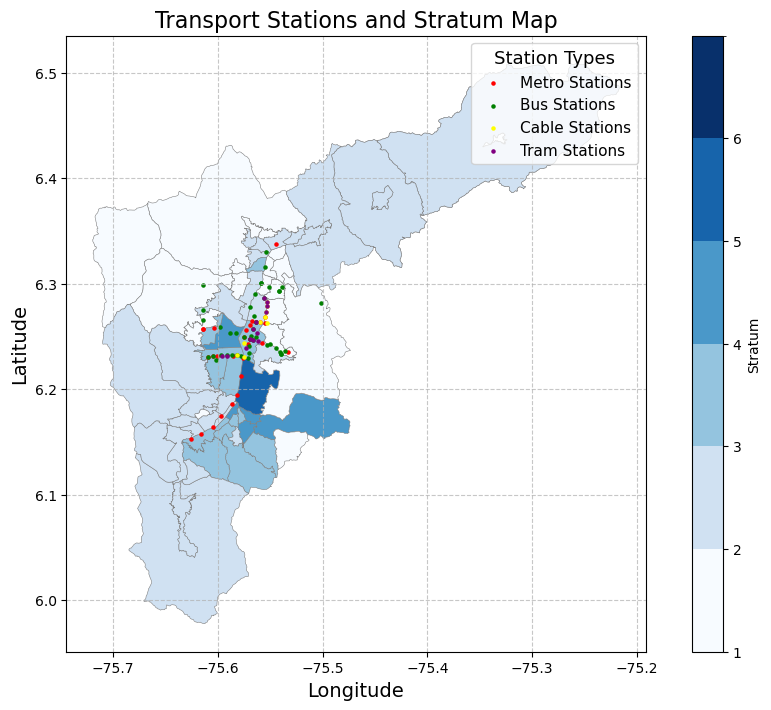

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the colormap and boundaries
cmap = plt.get_cmap('Blues', 6)
norm = mcolors.BoundaryNorm(boundaries=np.arange(1, 8), ncolors=6)

# Plot the final dataframe with the 'stratum' column
final_df.plot(ax=ax, column='stratum', legend=False, cmap=cmap, edgecolor='grey', linewidth=0.4, norm=norm)

# Plot the metro, bus, cable, and tram stations with customized markers and labels
metro_stations.plot(ax=ax, color='red', markersize=5, label='Metro Stations', linestyle='None')
bus_stations.plot(ax=ax, color='green', markersize=5, label='Bus Stations', linestyle='None')
cable_stations.plot(ax=ax, color='yellow', markersize=5, label='Cable Stations', linestyle='None')
tram_stations.plot(ax=ax, color='purple', markersize=5, label='Tram Stations', linestyle='None')

# Add a title and labels
ax.set_title('Transport Stations and Stratum Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Customize the station legend
legend = ax.legend(title='Station Types', title_fontsize='13', fontsize='11', loc='upper right')

# Create a colorbar with discrete values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, ticks=np.arange(1, 7), boundaries=np.arange(0.5, 7.5, 1))
cbar.set_label('Stratum')
cbar.ax.set_yticklabels([1, 2, 3, 4, 5, 6])

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


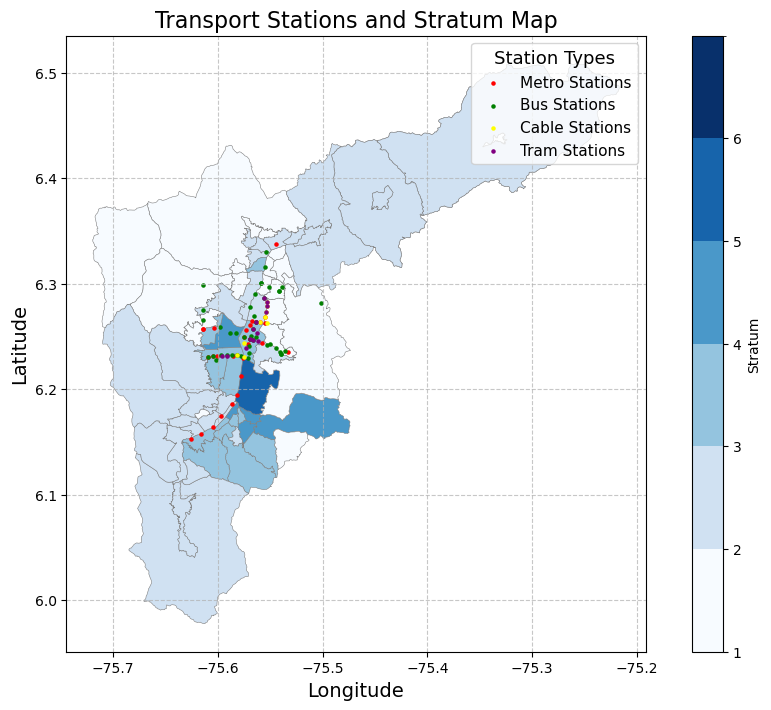

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the colormap and boundaries
cmap = plt.get_cmap('Blues', 6)
norm = mcolors.BoundaryNorm(boundaries=np.arange(1, 8), ncolors=6)

# Plot the final dataframe with the 'stratum' column
final_df.plot(ax=ax, column='', legend=False, cmap=cmap, edgecolor='grey', linewidth=0.4, norm=norm)

# Plot the metro, bus, cable, and tram stations with customized markers and labels
metro_stations.plot(ax=ax, color='red', markersize=5, label='Metro Stations', linestyle='None')
bus_stations.plot(ax=ax, color='green', markersize=5, label='Bus Stations', linestyle='None')
cable_stations.plot(ax=ax, color='yellow', markersize=5, label='Cable Stations', linestyle='None')
tram_stations.plot(ax=ax, color='purple', markersize=5, label='Tram Stations', linestyle='None')

# Add a title and labels
ax.set_title('Transport Stations and Stratum Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Customize the station legend
legend = ax.legend(title='Station Types', title_fontsize='13', fontsize='11', loc='upper right')

# Create a colorbar with discrete values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, ticks=np.arange(1, 7), boundaries=np.arange(0.5, 7.5, 1))
cbar.set_label('Stratum')
cbar.ax.set_yticklabels([1, 2, 3, 4, 5, 6])

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
